In [117]:
## 统计小说人物名词出现的频数

names = []
with open("./name.txt", mode='r', encoding='utf-8') as f:
  for line in f.readlines():
    names.append(line.replace("\n", ""))
    
print(names)
print(len(names))



['高步杰', '乔伯年', '石钟', '张生民', '秦富功长', '黑白', '武宏全', '苗凯', '高凤阁', '冯世宽', '白元', '武得全', '武惠良', '田润叶', '杜正贤', '杜丽丽', '顾尔纯', '贾冰', '古风铃', '田福军', '马国雄', '李登云', '冯世宽', '张有智', '周文龙', '徐国强', '徐爱云', '田晓霞', '白明川', '徐治功', '杨高虎', '刘根民', '周文军', '刘志祥', '曹书记', '雷区长', '王世才', '惠英', '孙少平', '安锁子', '田福堂', '田润生', '田海民', '孙玉亭', '孙兰香', '孙玉厚', '孙少安', '金俊武', '金俊山', '贺秀莲', '金俊海', '刘玉升', '金光亮', '金俊斌', '金光辉', '王彩娥', '金波', '金秀', '金富', '王满银', '孙兰花', '胡永州', '胡永合', '小翠', '金强', '卫红', '侯玉英', '萝卜花', '田五', '田四', '藏族姑娘', '胡得禄', '胡得福', '南洋女人', '金先生', '憨牛', '贺耀宗', '田晓晨', '马来花', '李玉铃']
80


In [114]:
with open("./compose_books.txt", mode='r',encoding='utf-8') as f:
  content = f.read()
  # for name in names:
    

In [115]:
import os

person_freq_dict = {}

def get_person_freq(dict, words_list):
  '''
  dict: 人物词频词典
  words_list: 分词的章内容
  '''
  for word in words_list:
    if word in names:
      if word in dict:
        dict[word] += 1
      else:
        dict[word] = 1
  return dict

dir = "../LDA/分词/"
files_name = os.listdir(dir)
first_file = files_name[0]
print(first_file)


chapter_name = dir + first_file
def chapter_words_list(chapter_name):
  words_list = []
  with open(chapter_name, mode='r', encoding='utf-8') as f:
    file_str = f.read().replace("\n", " ")
    words_list = [word for word in file_str.split(" ")]
  return words_list




分词_第100章.txt


In [118]:
test_word_list = chapter_words_list(chapter_name)
test_dict = {}
get_person_freq(test_dict, test_word_list)
print(test_dict)

{'田五': 1, '李登云': 12}


In [119]:
# 对列表进行排序
import re
s = "[0-9]+"
pattern = re.compile(s)
res = [int(pattern.search(name).group()) for name in files_name]
# print(res)
# print(type(res.group()))
from pandas import DataFrame, Series
obj = Series(files_name, index=res)
files_name = obj.sort_index().values
print(files_name)


['分词_第1章.txt' '分词_第2章.txt' '分词_第3章.txt' '分词_第4章.txt' '分词_第5章.txt'
 '分词_第6章.txt' '分词_第7章.txt' '分词_第8章.txt' '分词_第9章.txt' '分词_第10章.txt'
 '分词_第11章.txt' '分词_第12章.txt' '分词_第13章.txt' '分词_第14章.txt' '分词_第15章.txt'
 '分词_第16章.txt' '分词_第17章.txt' '分词_第18章.txt' '分词_第19章.txt' '分词_第20章.txt'
 '分词_第21章.txt' '分词_第22章.txt' '分词_第23章.txt' '分词_第24章.txt' '分词_第25章.txt'
 '分词_第26章.txt' '分词_第27章.txt' '分词_第28章.txt' '分词_第29章.txt' '分词_第30章.txt'
 '分词_第31章.txt' '分词_第32章.txt' '分词_第33章.txt' '分词_第34章.txt' '分词_第35章.txt'
 '分词_第36章.txt' '分词_第37章.txt' '分词_第38章.txt' '分词_第39章.txt' '分词_第40章.txt'
 '分词_第41章.txt' '分词_第42章.txt' '分词_第43章.txt' '分词_第44章.txt' '分词_第45章.txt'
 '分词_第46章.txt' '分词_第47章.txt' '分词_第48章.txt' '分词_第49章.txt' '分词_第50章.txt'
 '分词_第51章.txt' '分词_第52章.txt' '分词_第53章.txt' '分词_第54章.txt' '分词_第55章.txt'
 '分词_第56章.txt' '分词_第57章.txt' '分词_第58章.txt' '分词_第59章.txt' '分词_第60章.txt'
 '分词_第61章.txt' '分词_第62章.txt' '分词_第63章.txt' '分词_第64章.txt' '分词_第65章.txt'
 '分词_第66章.txt' '分词_第67章.txt' '分词_第68章.txt' '分词_第69章.txt' '分词_第70章.txt'
 '分词_第71章.txt' 

In [120]:
total_dict = {}
n = 1
def init_dict(dict):
  for name in names:
    dict[name] = 0
  return dict
  
for name in files_name:
  chapter_name = dir + name
  # print("=> {}".format(chapter_name))
  words_list = chapter_words_list(chapter_name)
  freq_dict = {}
  freq_dict = init_dict(freq_dict)
  get_person_freq(freq_dict, words_list)
  # print("{}=>人物词频结果 {}".format(chapter_name,freq_dict))
  total_dict[n] = freq_dict
  n += 1

# print(total_dict)
print("=> 各章节词频获取结束")
df = DataFrame.from_dict(total_dict, orient="index").sort_index()
df
names_freq = df.to_csv()
with open('./names_freq.csv', mode='w', encoding='utf-8') as f:
  f.write(names_freq)

=> 各章节词频获取结束


In [121]:
np.arange(0,len(df.columns),1)
df.columns

Index(['高步杰', '乔伯年', '石钟', '张生民', '秦富功长', '黑白', '武宏全', '苗凯', '高凤阁', '冯世宽',
       '白元', '武得全', '武惠良', '田润叶', '杜正贤', '杜丽丽', '顾尔纯', '贾冰', '古风铃', '田福军',
       '马国雄', '李登云', '张有智', '周文龙', '徐国强', '徐爱云', '田晓霞', '白明川', '徐治功', '杨高虎',
       '刘根民', '周文军', '刘志祥', '曹书记', '雷区长', '王世才', '惠英', '孙少平', '安锁子', '田福堂',
       '田润生', '田海民', '孙玉亭', '孙兰香', '孙玉厚', '孙少安', '金俊武', '金俊山', '贺秀莲', '金俊海',
       '刘玉升', '金光亮', '金俊斌', '金光辉', '王彩娥', '金波', '金秀', '金富', '王满银', '孙兰花',
       '胡永州', '胡永合', '小翠', '金强', '卫红', '侯玉英', '萝卜花', '田五', '田四', '藏族姑娘', '胡得禄',
       '胡得福', '南洋女人', '金先生', '憨牛', '贺耀宗', '田晓晨', '马来花', '李玉铃'],
      dtype='object')

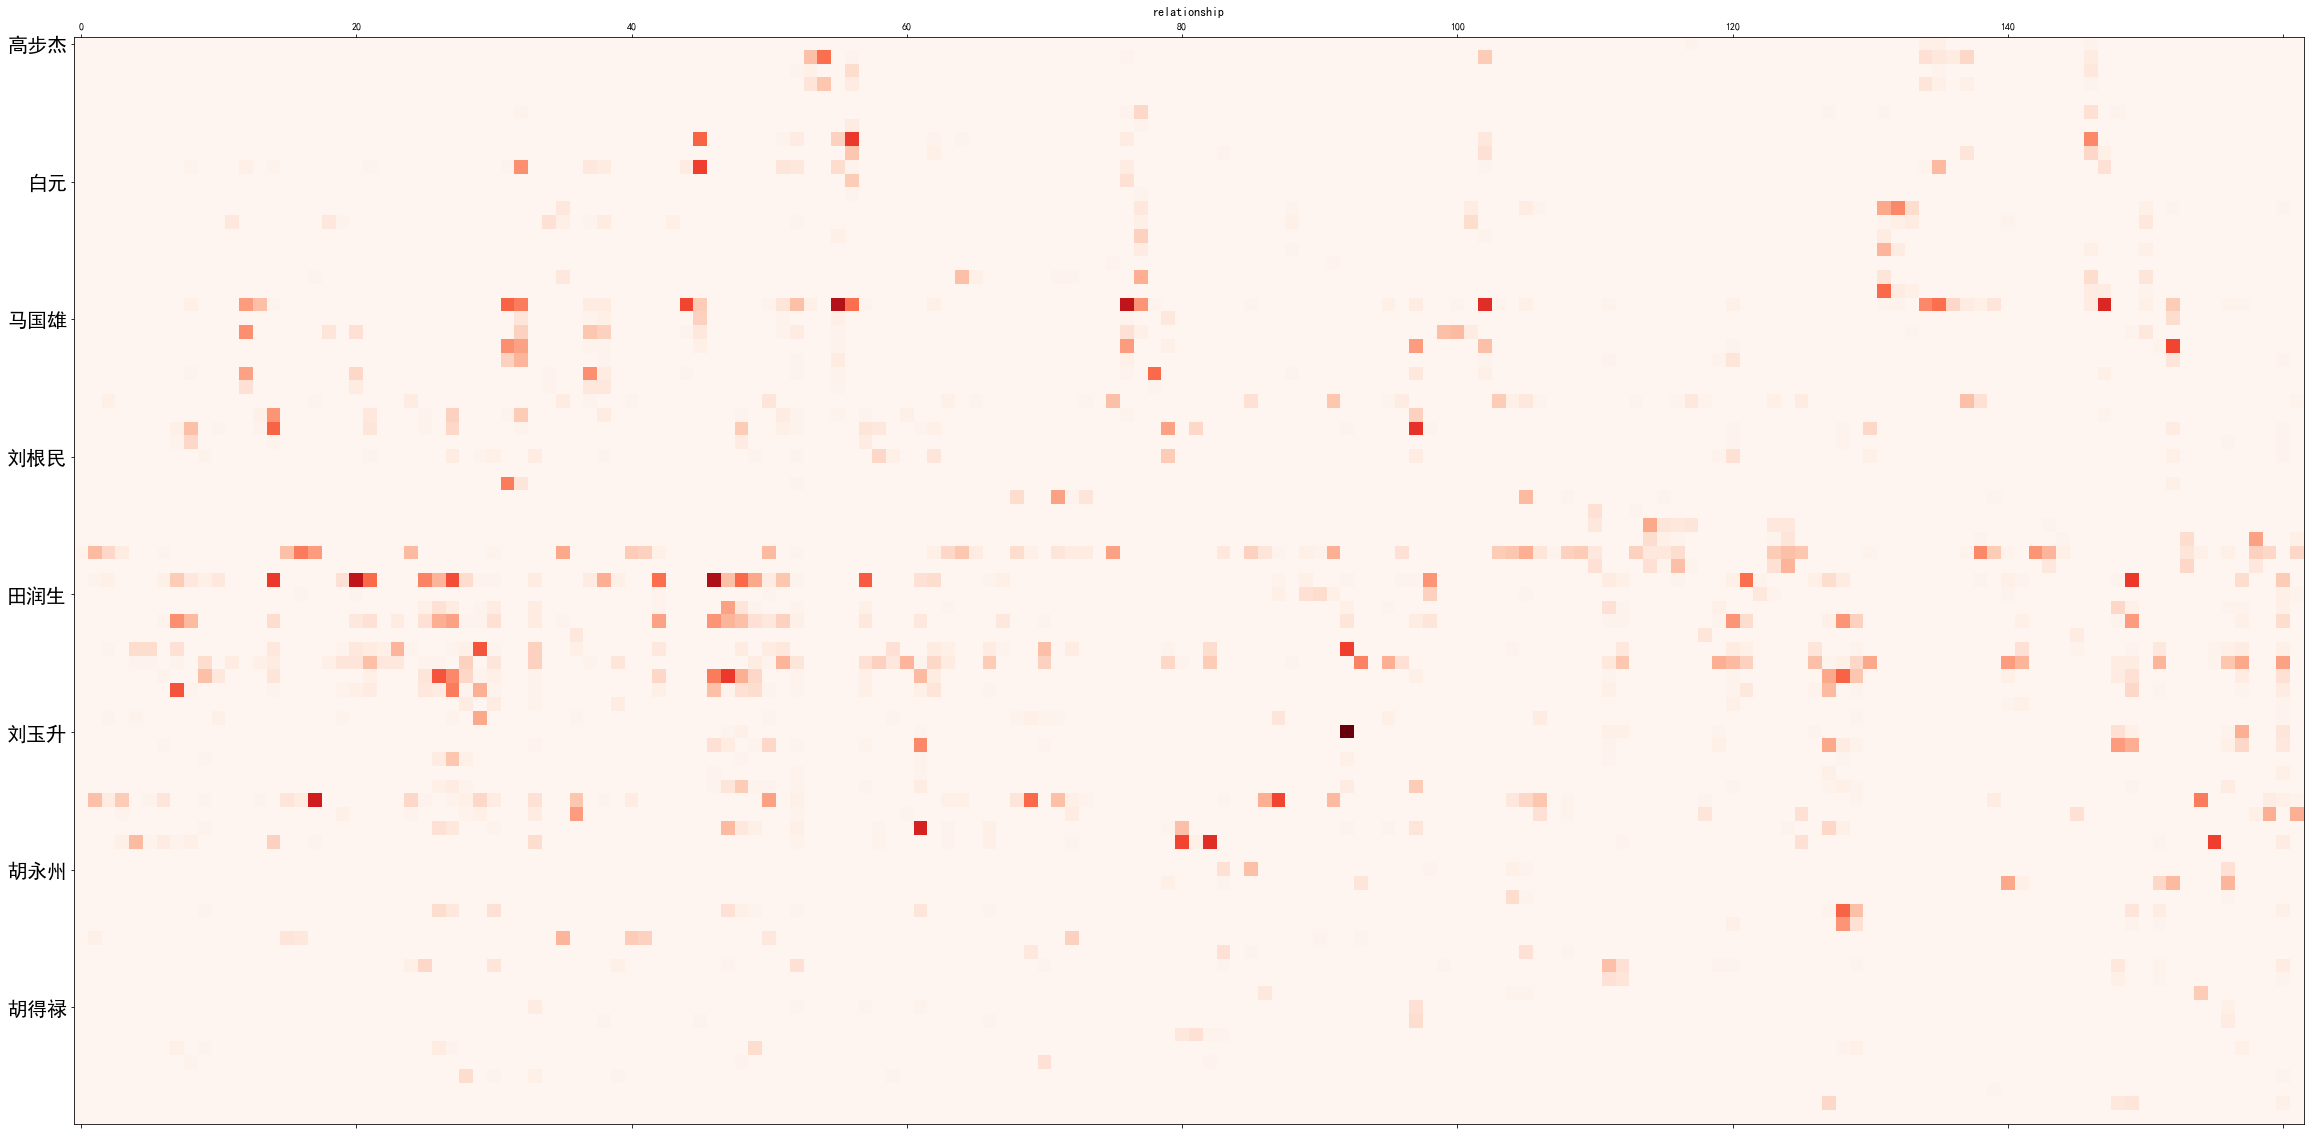

In [123]:
df.iloc[1,1]
### 画出每章节的人物关系图，实现动态变化
df.values

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(40,20))
plt.xticks(ticks=np.arange(0,160,1),labels=np.arange(0,160,1))
plt.yticks(ticks=np.arange(0,len(df.columns),1),labels=df.columns,fontsize=20)

plt.matshow(df.values.transpose(1,0),cmap=plt.cm.Reds,fignum=0)

plt.title("relationship")
plt.show()

In [ ]:
# plt.figure(figsize=(20,40))
fig, ax = plt.subplots(len(df.columns),160)
im = ax.imshow(df.values.transpose(1,0))
ax.set_xticks(np.arange(160))
ax.set_yticks(np.arange(len(df.columns)), labels=df.columns,fontsize=8)

ax.set_title("relationship")
fig.tight_layout()
plt.show()

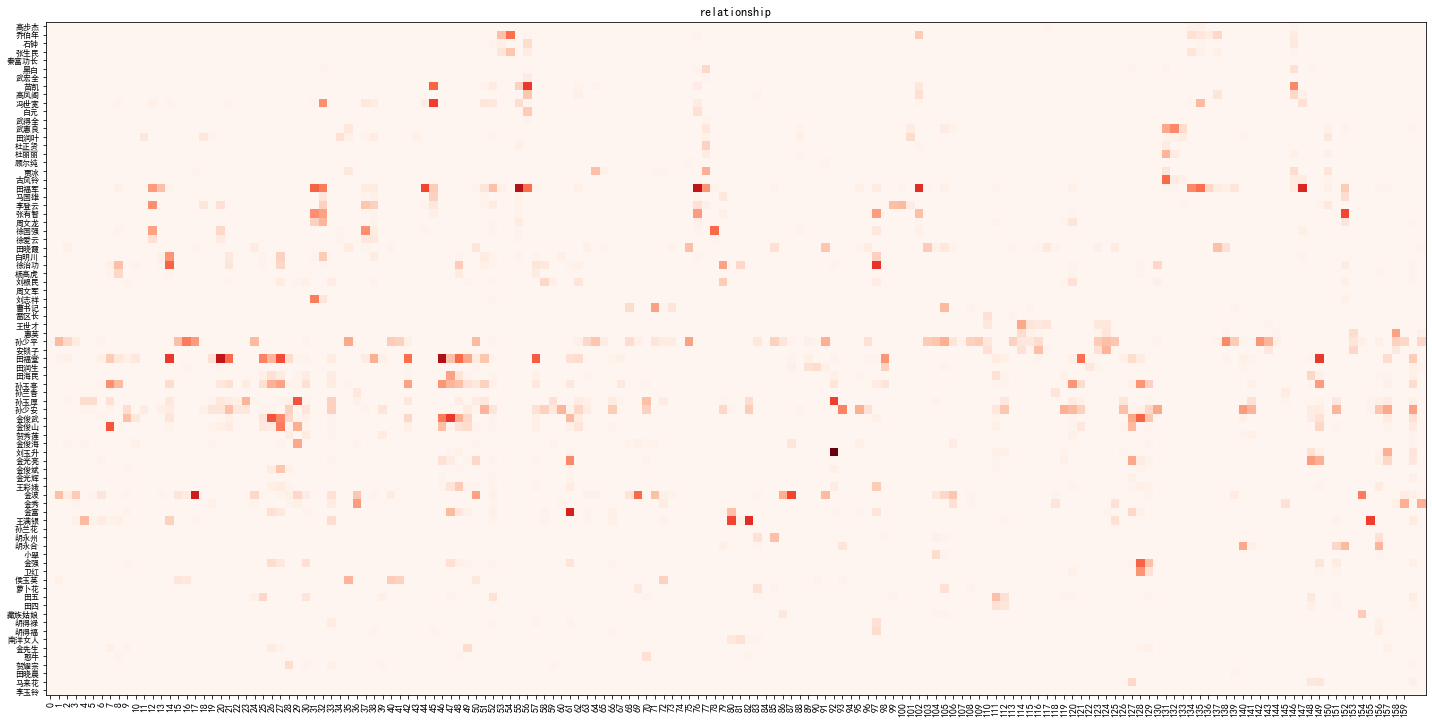

In [124]:
# plt.figure(figsize=(40,20))
fig, ax = plt.subplots(figsize=(20,20))
im = ax.imshow(df.values.transpose(1,0),cmap=plt.cm.Reds)
ax.set_xticks(np.arange(160),labels=[str(n) for n in range(160)], rotation=90,fontsize=10)
ax.set_yticks(np.arange(len(df.columns)), labels=df.columns,fontsize=8)
ax.set_title("relationship")
fig.tight_layout()
plt.show()

In [158]:
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence
from gensim import corpora

sentences = LineSentence('./compose_books.txt')
print("starting to fit the book")
model = Word2Vec(sentences, vector_size=50, window=10, sg=1,min_count=3, workers=2,negative=3,sample=0.001,hs=1)
# print(sentences.max_sentence_length)
model.save("book.model")


starting to fit the book


In [2]:
from gensim.models import word2vec
import gensim

sentences = word2vec.Text8Corpus("./compose_books.txt")
model = gensim.models.Word2Vec(sentences,sg=1,window=5,min_count=1,negative=3,sample=0.001,hs=1,workers=4)
model.save("book.model")
model.wv.save_word2vec_format("book.model.bin", binary=True)


In [6]:
vectors = model.wv.vectors
print(vectors.shape)

unknown_names = []
with open("./compose_books.txt",mode='r',encoding='utf-8') as f:
  content = f.read().replace("\n", " ")
  for name in names:
    if name not in content:
      print(f"{name} is not searched")
      unknown_names.append(name)
      
print(unknown_names)
    

(33613, 100)
秦富功长 is not searched
周文军 is not searched
孙兰花 is not searched
李玉铃 is not searched
['秦富功长', '周文军', '孙兰花', '李玉铃']


In [7]:
from gensim.models import word2vec
import gensim
from torch import embedding

sentences = word2vec.Text8Corpus("./compose_books.txt")
model = gensim.models.Word2Vec(sentences,sg=1,window=5,min_count=1,negative=3,sample=0.001,hs=1,workers=4)
model.save("book.model")
model.wv.save_word2vec_format("book.model.bin", binary=True)

embedding = {}
for name in names:
  if name in unknown_names:
    continue
  else:
    name_embeding = model.wv[name]
    embedding[name] = name_embeding
    
print(len(embedding))

75


In [8]:
print(embedding)

{'高步杰': array([ 0.13430965,  0.18827641,  0.04360847,  0.09199496,  0.17366374,
       -0.30539942, -0.12260994, -0.05226825, -0.2302559 , -0.07949141,
       -0.42090523, -0.2147498 ,  0.078676  , -0.03003788, -0.25117138,
        0.04448574,  0.26437336, -0.2964737 , -0.01422585, -0.2560837 ,
        0.04336046,  0.28804272, -0.2334667 ,  0.07125281,  0.20189881,
       -0.12547888, -0.00882987, -0.00290393, -0.19515091, -0.11402655,
        0.4975989 ,  0.19233267, -0.09784143, -0.07740799, -0.19819357,
       -0.266263  , -0.07596064,  0.16506381,  0.18069127, -0.2651878 ,
        0.23567453, -0.09815444,  0.06736244,  0.03755319, -0.04756573,
       -0.12536977,  0.23571287, -0.15533935, -0.10681334,  0.06494322,
       -0.07672306, -0.03465448,  0.09334618, -0.07755678, -0.14059468,
        0.2813605 ,  0.13715765, -0.2752381 , -0.19539317, -0.04029097,
       -0.03198847,  0.27408093, -0.31057677, -0.04445635, -0.16496861,
       -0.01905894,  0.039217  , -0.20214224, -0.0760104

C:\python37\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


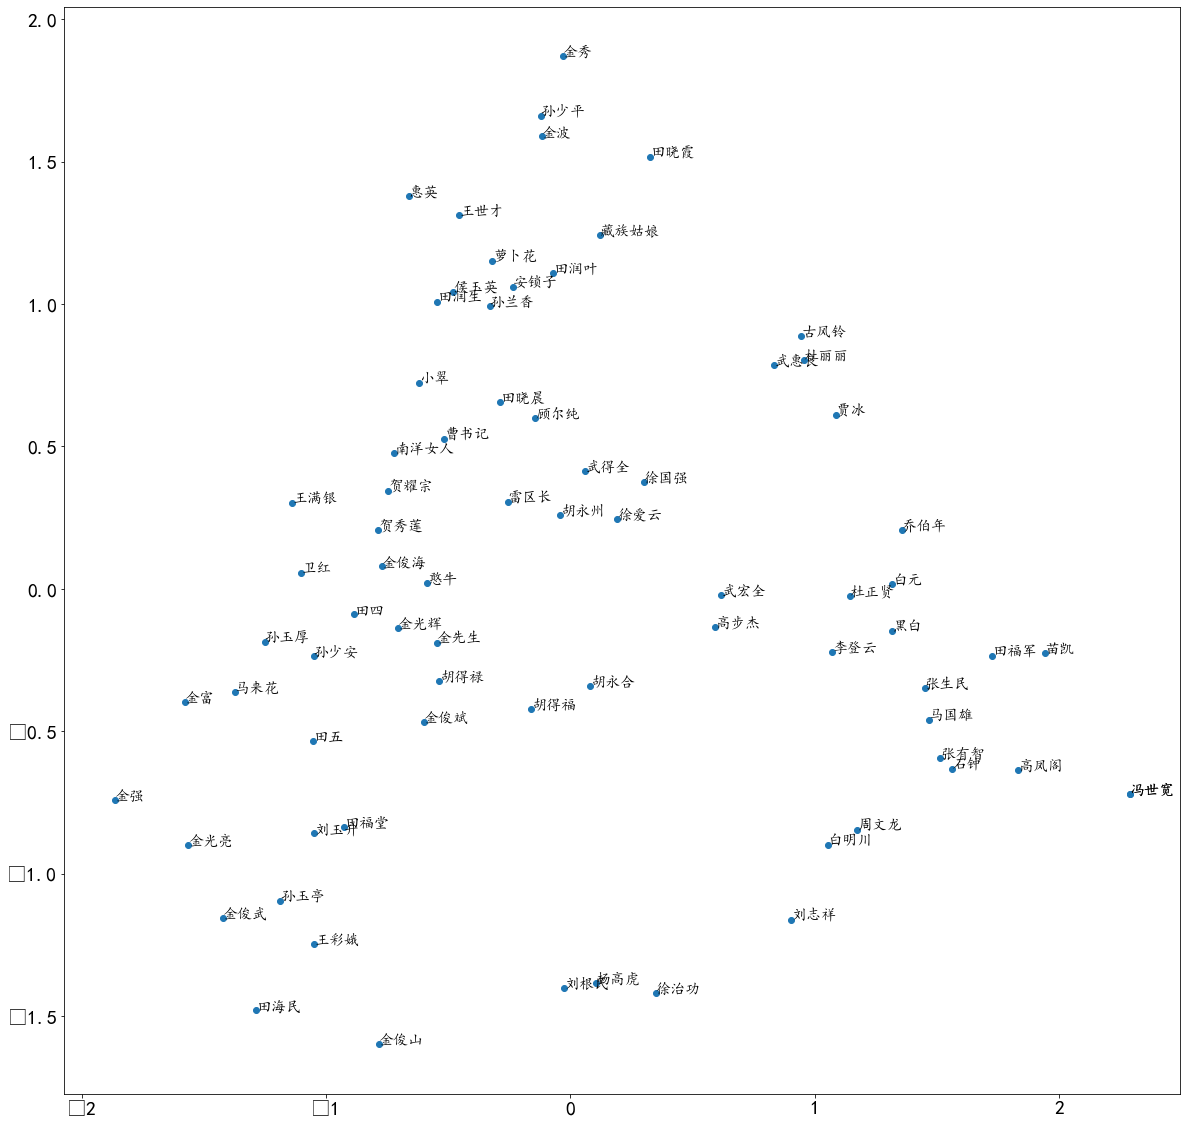

In [78]:
exit_names = list(filter(lambda x: x not in unknown_names, names))
# print(exit_names)
# print(unknown_names)

names_index = [model.wv.get_index(name) for name in exit_names]
X = model.wv[names_index]
X
from sklearn.decomposition import PCA
from matplotlib import pyplot

names_key = [model.wv.index_to_key[index] for index in names_index]
# len(names_key)
# index = model.wv.get_vector("孙少平")
# index
pca = PCA(n_components=3)
result = pca.fit_transform(X)

pyplot.figure(figsize=(20,20))
pyplot.scatter(result[:,0],result[:,1])
# words = list(model.wv.key_to_index)
pyplot.rcParams['font.sans-serif'] = ['KaiTi']
pyplot.rcParams.update({"font.size":15})
for i, word in enumerate(names_key):
#   print(word)
  pyplot.annotate(word, xy=(result[i,0],result[i,1]),)
pyplot.show()



In [132]:
## 词云
counts = {}
chiyun =[]
words = []

with open("./compose_books.txt",mode='r',encoding='utf-8') as book:
  content = book.read().replace("\n", " ")
  words = content.split(" ")
  
# words
for word in words:
  if len(word) < 2: 
    continue
  else:
    counts[word] = counts.get(word,0) + 1
    
items = list(counts.items())

items.sort(key=lambda x: x[1],reverse=True)
print("{0:<5}{1:<8}{2:<5}{3:<5}".format('序号','词语','频率',"词性"))
import jiagu
for i in range(30):
  word,count = items[i]
  print("{0:<5}{1:<8}{2:<5}{3:>5}".format(i+1,word,count,jiagu.pos([word])[0]))

序号   词语      频率   词性   
1    少平      856      n
2    两个      754      n
3    生活      619      n
4    地方      590      n
5    少安      572      n
6    田福堂     537      n
7    双水村     529      n
8    家里      528     nl
9    孙少平     473     nh
10   黄原      468     nh
11   一种      449      i
12   田福军     449      n
13   工作      437      n
14   一块      434      n
15   公社      421      n
16   孙少安     419     nh
17   父亲      406      n
18   感到      395      v
19   孩子      390      n
20   儿子      361      n
21   几个      341     mq
22   一点      334     mq
23   圪节      333      n
24   回来      323     vd
25   金波      310      n
26   领导      303      n
27   孙玉亭     302     nh
28   主任      287      n
29   坐在      282      v
30   不知      280      v


In [91]:
# items
text_cut = '/'.join([name for (name,_) in items[:200]])
print(text_cut)

少平/两个/生活/地方/少安/田福堂/双水村/家里/孙少平/黄原/一种/田福军/工作/一块/公社/孙少安/父亲/感到/孩子/儿子/几个/一点/圪节/回来/金波/领导/孙玉亭/主任/坐在/不知/润叶/金俊武/书记/村里/学校/院子/东西/这是/地区/来到/几天/劳动/晚上/痛苦/农民/眼睛/晓霞/娃娃/农村/世界/玉亭/情况/也许/孙玉厚/只好/很快/回家/老汉/面前/回到/向前/办法/窑洞/女儿/本来/脸上/这件/秀莲/干部/衣服/汽车/旁边/一会/地上/外面/时间/吃饭/女人/身上/这位/想到/妹妹/丈夫/离开/实际上/发现/城市/妻子/公路/弟弟/手里/听见/男人/金俊山/感情/日子/徐治功/关系/想起/老婆/王满银/医院/藏书/只能/母亲/一声/回去/几年/顾养民/大队/东拉河/兰香/朋友/心情/一家人/小子/之中/当年/一年/老人/这事/有人/没什么/事情/情绪/姑娘/除过/激动/一条/泪水/结婚/此刻/返回/人群/兰花/润生/听说/姐夫/说话/光景/忍不住/张有智/大部分/第二天/看着/说不定/庄稼人/永远/一把/一件/不好/明白/地委/这时候/不幸/县城/街上/二爸/哥哥/命运/精神/一下子/众人/一只/下午/发生/金光亮/同志/终于/红梅/宿舍/跟着/罐子/解决/李登云/家庭/县上/参加/青年/等待/媳妇/告诉/冯世宽/三个/不行/一位/一身/姐姐/亲爱/眼前/社会/干活/金富/煤矿/砖场/城里/头发/庄稼/师傅/幸福


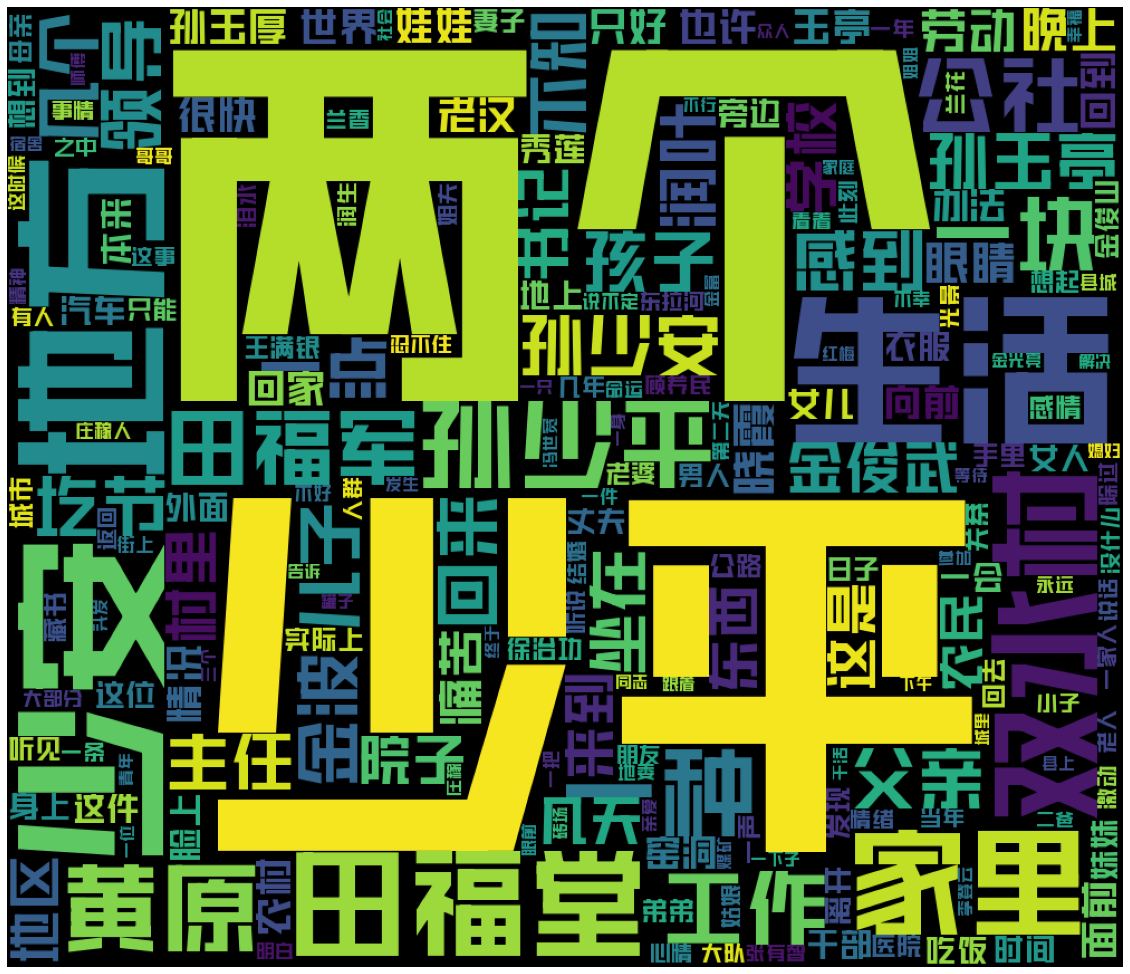

In [100]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='black',font_path = 'font.ttf',width=1000, height=860, margin=2).generate(text_cut)

# pyplot.rcParams['font.sans-serif'] = ['KaiTi']
pyplot.figure(figsize=(20,30))
pyplot.imshow(wordcloud)
pyplot.axis('off')
pyplot.show()

1044


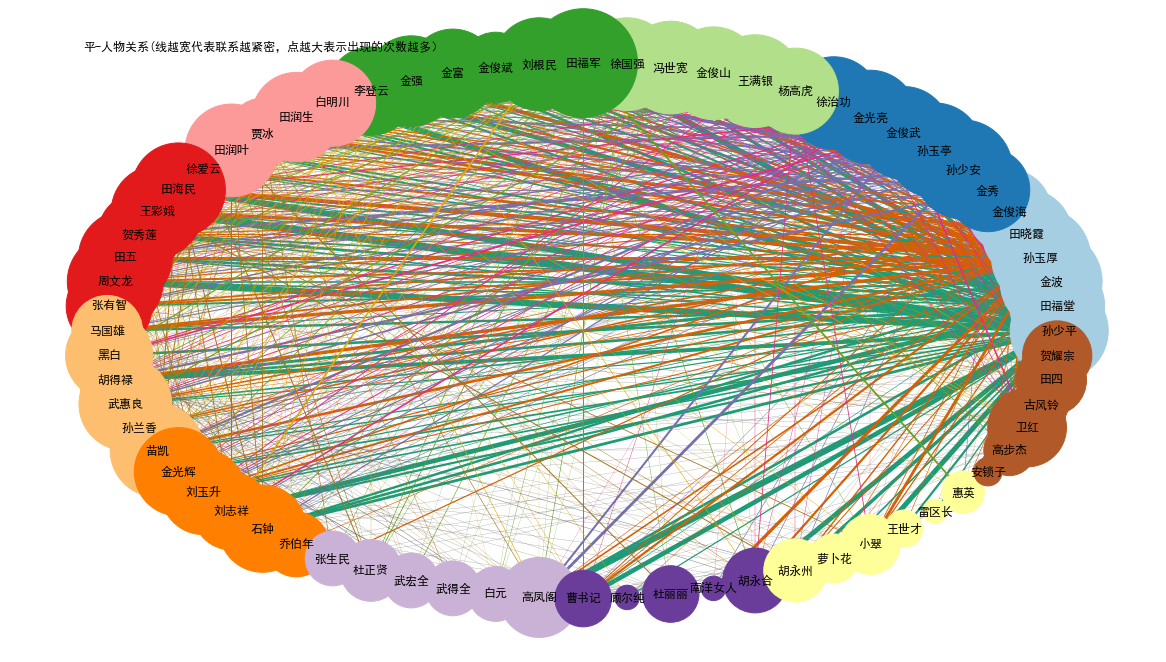

In [122]:
from collections import Counter
from itertools import combinations
import networkx as nx
import matplotlib.pyplot as plt

exit_names
with open("./compose_books.txt",mode='r',encoding='utf-8') as book:
  relationlist = []
  for line in book.readlines():
    n = []
    for i in exit_names:
      for j in exit_names[exit_names.index(i)+1:]:
        if i in line and j in line and i != j:
          n.append(i)
          
    relationlist+=combinations(sorted(set(n)),2)
    
  relationDict = Counter(relationlist)

edgeWidth = []
for i in relationDict.values():
  edgeWidth.append(i/5)
  
print(len(edgeWidth))
plt.figure(figsize=(16,9))
g=nx.MultiGraph()
g.add_edges_from(relationDict.keys())
d=dict(g.degree)
nx.draw_circular(g,nodelist=d.keys(),node_size=[v*200 for v in d.values()],node_color=range(68),cmap=plt.cm.Paired,with_labels=True,edge_color=range(len(relationDict)),edge_cmap=plt.cm.Dark2,alpha=1.0,width=edgeWidth)

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.text(-1.05,1.05,'%s-人物关系(线越宽代表联系越紧密，点越大表示出现的次数越多）'%"平凡的世界"[:-4],fontsize=12)


plt.savefig('%s-=人物关系图.png'%"compose_books"[:-4],dpi=120)#单个像素的DPI

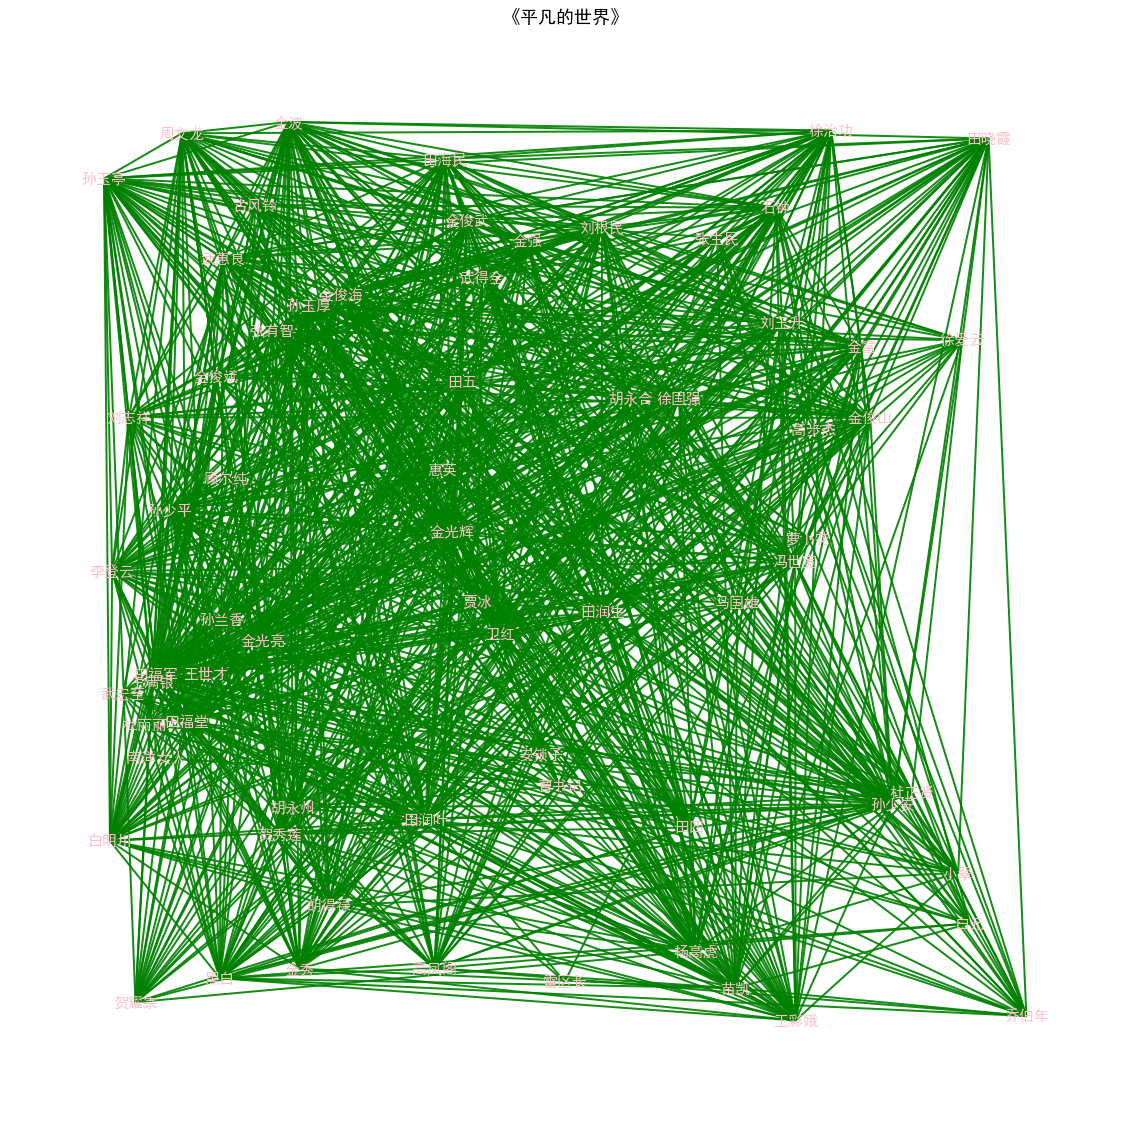

In [164]:
plt.figure(figsize=(20,20))
G = nx.Graph()
for (p1,p2),weight in relationDict.items():
  G.add_edge(p1,p2,weight=weight)

elarge = [(u,v) for (u,v,d) in G.edges(data=True) if d['weight']>0.2]
emidle = [(u,v) for (u,v,d) in G.edges(data=True) if (d['weight']>0.1) & (d['weight']<=0.2)]
esmall = [(u,v) for (u,v,d) in G.edges(data=True) if d['weight']<=0.1]

# pos = nx.spring_layout(G)
pos = nx.random_layout(G)
nx.draw_networkx_edges(G,pos,edgelist=elarge,width=2,alpha=0.9,edge_color='g')
nx.draw_networkx_edges(G,pos,edgelist=emidle,width=1.5,alpha=0.6,edge_color='y')
nx.draw_networkx_edges(G,pos,edgelist=esmall,width=1,alpha=0.3,edge_color='r',style='dashed')

nx.draw_networkx_labels(G,pos,font_size=15,font_color='pink')
plt.axis('off')
plt.title("《平凡的世界》")
plt.show()


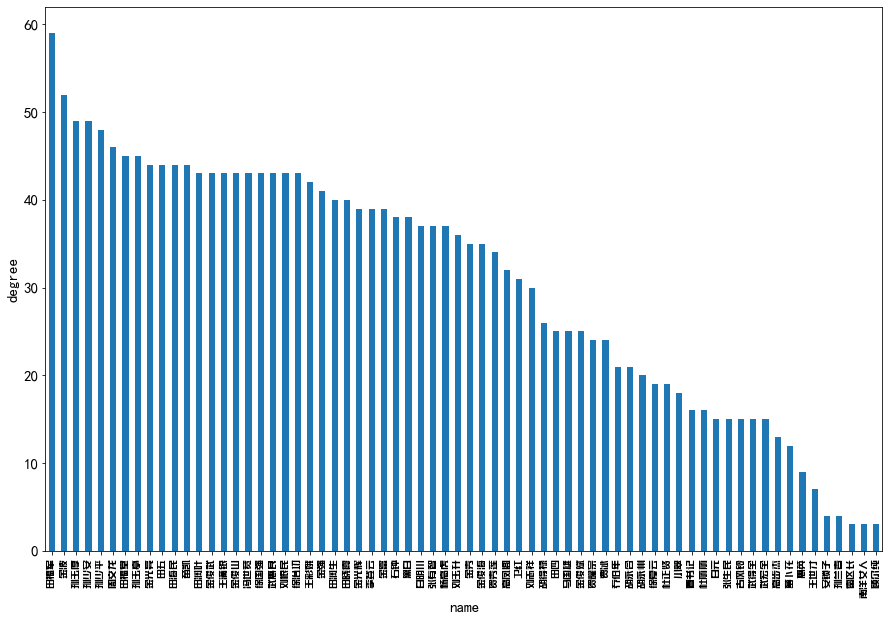

In [162]:
import pandas as pd
import matplotlib
Gdegree = nx.degree(G)
Gdegree = dict(Gdegree)
Gdegree = pd.DataFrame({"name":list(Gdegree.keys()),"degree":list(Gdegree.values())})
Gdegree.sort_values(by="degree",ascending=False).plot(
  x = "name",
  y = "degree",
  kind = "bar",
  figsize = (15,10),
  legend = False
)

font = matplotlib.font_manager.FontProperties(fname=r"./font.ttf")
plt.xticks(fontproperties=font, size=10)
plt.ylabel("degree")
plt.show()

In [384]:
## change name text to picture
import os
import pygame

pygame.init()
font = pygame.font.Font("./font.ttf",40)
# rtext = font.render(text,True,(0,0,0),(255,255,255))
# pygame.image.save(rtext,"./name_pic/test.jpg")

for name in exit_names:
  text = name
  rtext = font.render(text,True,(255,255,255),(0,0,0))
  pygame.image.save(rtext,f"./name_pic/{name}.jpg")


In [385]:
from PIL import Image

test_image = "./name_pic/" + exit_names[0] + ".jpg"
pic = np.array(Image.open(test_image))
# plt.imshow(pic)
# print(pic.shape)
# pic = pic.reshape(1,pic.shape[0],pic.shape[1])
# print(pic.shape)


def get_pic(pic_name):
  image_name = "./name_pic/" + pic_name + ".jpg"
  pic = np.array(Image.open(image_name).resize((120,40),Image.ANTIALIAS))
  pic = pic.transpose(2,0,1)
  # pic = pic.
  return pic


# for name in exit_names:
#   plt.figure(figsize=(5,5))
#   p = get_pic(name)
#   # print(p.shape)
#   plt.annotate(name, xy=(0,0))
#   plt.imshow(p)

In [388]:
from torch.utils.tensorboard import SummaryWriter
import numpy as np
len(embedding)
writer = SummaryWriter(f"./tb/name_vector")

time = 1
labels = []

count = 0
for name, v in embedding.items():
  i = get_pic(name)
  if time == 1:
    res = v.reshape(1,100)
    images = i.reshape((1,i.shape[0],i.shape[1],i.shape[2]))
    time = 0
  else:
    v = v.reshape(1,100)
    i = i.reshape((1,i.shape[0],i.shape[1],i.shape[2]))
    res = np.concatenate((res,v),axis=0)
    images = np.concatenate((images, i),axis=0)
  
  labels.append(name) 
  # if count == 4:
  #   break
  # count += 1

print(len(labels))
print(len(res))
print(images.shape)
# plt.imshow(images)
# for i in range(len(images)):
#   plt.imshow(image[i])
# for i in range(100):
# torch.tensor(res)
# images = torch.tensor(images)
writer.add_embedding(torch.tensor(res), metadata=labels)
  



75
75
(75, 3, 40, 120)


In [375]:
print(len(labels))
test_image = torch.tensor(images)

75


In [376]:
# # print(labels)
# print(images.shape)
print(type(test_image))
test_image = test_image.numpy()
print(type(test_image))


<class 'torch.Tensor'>
<class 'numpy.ndarray'>


In [390]:
# for i in range(len(labels)):
#   plt.figure(figsize=(5,5))
#   plt.annotate(labels[i],xy=(0,0))
  # plt.imshow(images[i].transpose(1,2,0))

In [26]:
## 文本摘要
from textrank4zh import TextRank4Sentence

with open("../LDA/book/第1章.txt",mode='r',encoding='utf-8') as book:
  text = book.read()
  tr4s = TextRank4Sentence()
  tr4s.analyze(text=text, lower=True, source="all_filters")
  
  print("\n摘要:")
  for item in tr4s.get_key_sentences(num=10):
    print(item.index, item.weight, item.sentence)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ljj12\Temp\jieba.cache
Loading model cost 1.247 seconds.
Prefix dict has been built successfully.



摘要:
83 0.020603163955637112 他站起来，用手抹了一把脸，端着半碗剩菜汤，来到西南拐角处的开水房前，在水房后墙上伸出来的管子上给菜汤里搀了一些开水，然后把高粱面馍掰碎泡进去，就蹲在房檐下狼吞虎咽地吃起来
26 0.01997674347135912 丙菜也用小脸盆盛一点，说明吃这种下等伙食的人也没有多少
49 0.01905220969896305 她面前的三个菜盆里已经没有了菜，馍筐里也只剩了四个焦黑的高粱面馍
33 0.017774915357825494 贫困山区的农民尽管眼下大都少吃缺穿，但孩子既然到大地方去念书，家长们就是咬着牙关省吃藏书网节用，也要给他们做几件见人衣裳
25 0.01737914834918536 各班的甲菜只是在小脸盆里盛一点，看来吃得起肉菜的学生没有几个
45 0.017120305130484962 不大一会功夫，饭场上就稀稀落落的没有几个人了
27 0.016725910917378663 只有乙菜各班都藏书网用烧瓷大脚盆盛着，海海漫漫的，显然大部分人都吃这种既不奢侈也不寒酸的菜
47 0.01628129389301856 现在，只有高一〈１〉班的值日生一个人留在空无人迹的饭场上
68 0.015427646019038588 （可是除过他自己，谁又能知道，他那两只线袜子早已经没有了后跟，只是由于鞋的遮掩，才使人觉得那袜子是完好无缺的）
18 0.014969889014667654 每个人的饭菜都是昨天登记好并付了饭票的，因此程序并不复杂，现在值日生只是按饭表付给每人预订的一份


In [ ]:
## 情感分析

In [ ]:
## 词性标注

In [ ]:
## 人物关系相似度计算

[3020, 5766, 5364, 3580, 4600, 4902, 4166, 7263, 5749, 6604, 5219, 4146, 4472, 6428, 6177, 4045, 4432, 5574, 4604, 4859, 5222, 5298, 2381, 3570, 6365, 5578, 4526, 6338, 5445, 4766, 5850, 5256, 5201, 6072, 3034, 8310, 4658, 4630, 3908, 5361, 4707, 5153, 5409, 4708, 5638, 5587, 5333, 4907, 5154, 6179, 6209, 5622, 4139, 4882, 5059, 5608, 4827, 5514, 4839, 3621, 4870, 5606, 5316, 5401, 5010, 4518, 4462, 982, 4296, 4601, 4789, 4860, 4503, 4783, 14068, 4906, 5011, 4902, 4433, 3890, 5500, 4212, 4719, 3964, 4171, 4911, 5128, 4676, 4796, 4691, 4854, 5362, 5374, 4411, 5688, 4833, 4926, 5552, 4771, 4847, 5287, 4667, 5568, 5014, 4651, 4523, 3114, 2960, 5408, 5190, 5138, 4844, 4905, 4323, 4641, 4404, 4823, 4672, 4964, 4394, 5457, 4596, 5012, 5264, 5113, 5168, 4633, 5000, 5305, 5141, 4687, 4776, 4809, 4697, 4809, 5145, 4969, 4994, 4849, 4562, 4779, 5115, 4837, 3641, 1498, 4807, 4912, 5364, 5169, 5873, 5226, 5518, 5008, 4044, 4491, 5087, 5252, 5834, 4663, 5691, 6633, 3881]
804226


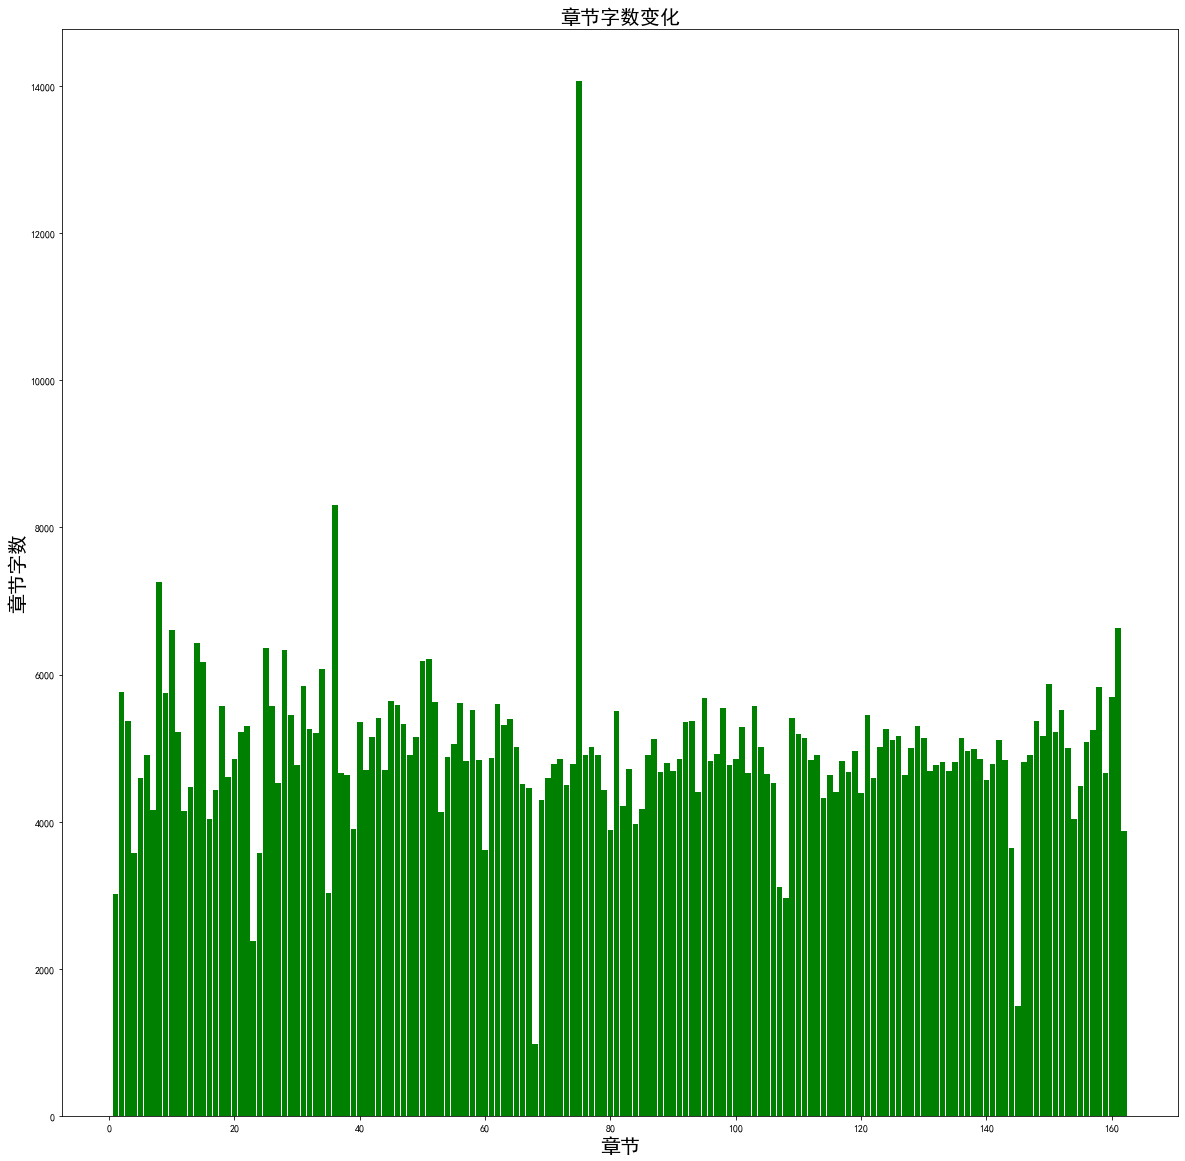

74

In [110]:
### 统计每张的字数
p = list(range(1,163,1))


chapter_words = []
for n in p:
  with open("../LDA/book/" + f"第{n}章.txt",mode='r',encoding='utf-8') as f:
    w = [w for w in f.read()]
    chapter_words.append(len(w))

print(chapter_words)
print(sum(chapter_words))
# -*- coding: utf-8 -*-
import numpy as np  
import matplotlib.mlab as mlab  
import matplotlib.pyplot as plt  
import matplotlib


matplotlib.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
# matplotlib.rcParams['fontsize']=10 

fig = plt.figure(figsize=(20,20))
plt.bar(p,chapter_words,0.9,color="green")
plt.xlabel("章节",fontsize=20)
plt.ylabel("章节字数",fontsize=20)
plt.title("章节字数变化",fontsize=20)
  
 
plt.show()  
# plt.savefig("barChart.jpg")
chapter_words.index(14068)

In [ ]:
import jiagu

def compute_pos(pos):
  res = {}
  for p in pos:
    res[p] = res.get(p,0) + 1
    
  return res

pos_statistic = {}
for n in p: 
  with open("../LDA/book/" + f"第{n}章.txt",mode='r',encoding='utf-8') as f:
    text = f.read()
    words = jiagu.seg(text)
    pos = jiagu.pos(words)
    res = compute_pos(pos)
    pos_statistic[n] = res


In [ ]:
print(pos_statistic)

In [34]:
max = 0
idx = -1

for n in p:
  if len(pos_statistic[n]) > max:
    max = len(pos_statistic[n])
    idx = n
    
print(idx)
print(pos_statistic[idx])

13
{'n': 604, 'c': 60, 'r': 201, 'd': 231, 'v': 541, 'nd': 42, 'w': 526, 'nt': 69, 'u': 238, 'nhf': 42, 'nhs': 29, 'mq': 20, 'p': 100, 'nl': 38, 'm': 62, 'vu': 17, 'a': 120, 'vl': 25, 'q': 33, 'i': 18, 'k': 3, 'vd': 30, 'ns': 7, 'nh': 15, 'j': 10, 'f': 4, 'e': 4, 'ni': 2, 'x': 1, 'o': 3, 'h': 2}


C:\python37\lib\site-packages\ipykernel_launcher.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.


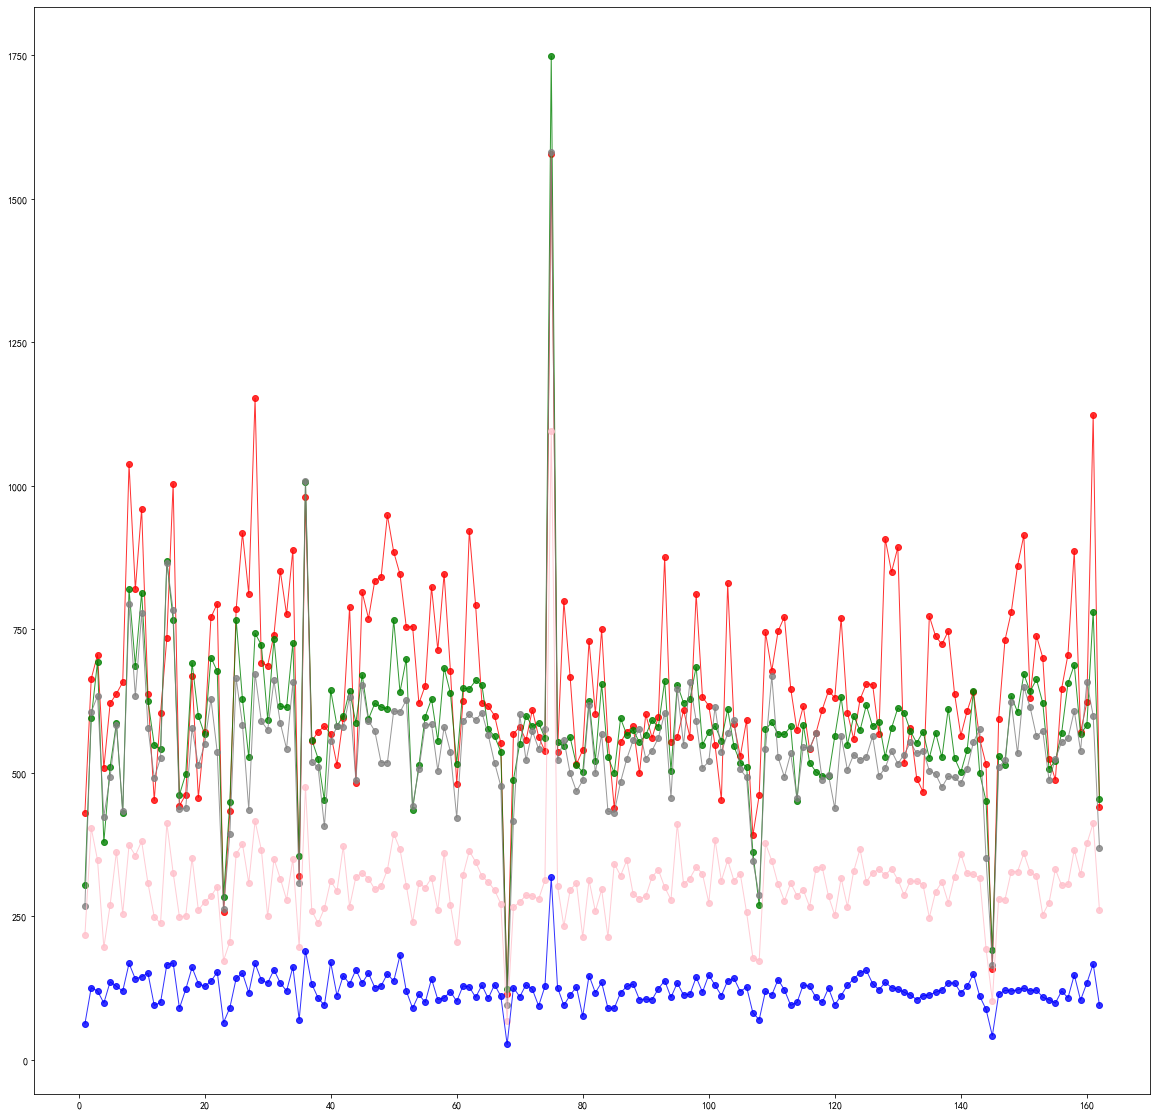

In [43]:
bench = list(pos_statistic[idx].keys())
bench


matplotlib.rcParams['font.sans-serif'] = ['SimHei']

bench = ['n','v','w','u','p']
color = ['Red', 'Green','Gray','Pink','Blue']

plt.figure(figsize=(20,20))
for i,type in enumerate(bench):
  Y = []
  
  for n in p:
   Y.append(pos_statistic[n].get(type,0)) 
  
  plt.plot(p,Y,'ro-', color=color[i], alpha=0.8,linewidth=1)
   
  # break
# len(Y)
plt.show()

In [127]:
# with open("../LDA/book.txt", mode='r',encoding='utf-8') as f:
#   text = f.read()
#   words = jiagu.seg(text)
#   pos = jiagu.pos(words)
#   res = compute_pos(pos)
  
jiagu.pos(["我"])
  

['r']

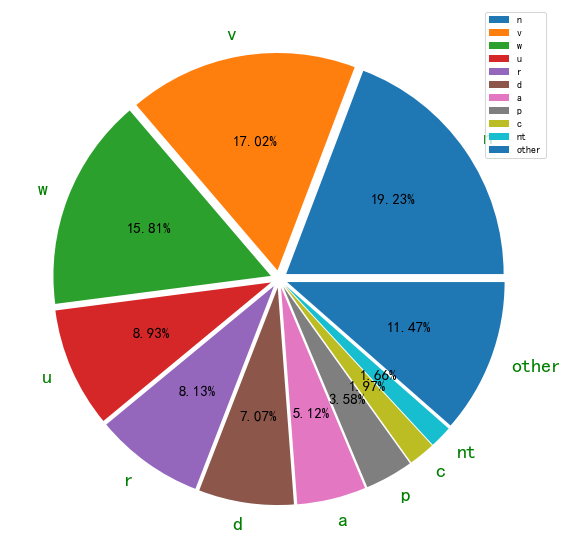

In [112]:
r = sorted(res.items(), key=lambda x: res[x[0]], reverse=True)
r
data = r[:10]
r[10:][1][1]
data.append(('other', sum([item[1] for item in r[10:]])))
labels = [item[0] for item in data]
labels
data = [item[1] for item in data]
data
plt.figure(figsize=(10,10))
explode = [0.04]*len(labels)
patches, l_text, p_text = plt.pie(data, labels=labels,explode=explode,autopct="%1.2f%%")

for t in l_text:
    t.set_size(20)
    t.set_color("Green")
for t in p_text:
    t.set_size(15)

plt.legend()
plt.show()
# explode


In [ ]:
import jiagu

# 吻别是由张学友演唱的一首歌曲。
# 《盗墓笔记》是2014年欢瑞世纪影视传媒股份有限公司出品的一部网络季播剧，改编自南派三叔所著的同名小说，由郑保瑞和罗永昌联合导演，李易峰、杨洋、唐嫣、刘天佐、张智尧、魏巍等主演。
docs = []
for n in p:
  with open("../LDA/book/" + f"第{n}章.txt",mode='r',encoding='utf-8') as f:
    text = f.read()
    docs.append(text) # 摘要
cluster = jiagu.text_cluster(docs)
print(cluster)



In [103]:
# for n in p:
#   with open("../LDA/book/" + f"第{n}章.txt",mode='r',encoding='utf-8') as f:
#     text = f.read()
#     sentiment = jiagu.sentiment(text)
#     print(sentiment)



('positive', 0.6856137120566815)
